<a href="https://colab.research.google.com/github/ShriKant114/ML-Project/blob/main/7_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/u

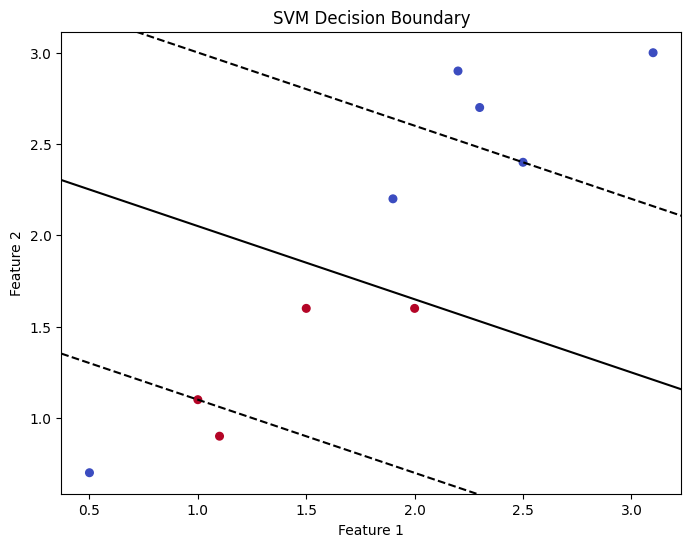

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load the data from CSV
data = pd.read_csv('data.csv')

# Step 2: Separate features and labels
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column (label)

# Step 3: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the SVM classifier
svm_model = SVC(kernel='linear')  # You can use 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = svm_model.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Plotting (only for 2D features)
if X.shape[1] == 2:
    def plot_svm_decision_boundary(X, y, model):
        plt.figure(figsize=(8,6))
        plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='coolwarm', s=30)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = model.decision_function(xy).reshape(XX.shape)

        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('SVM Decision Boundary')
        plt.show()

    import numpy as np
    plot_svm_decision_boundary(X, y, svm_model)
